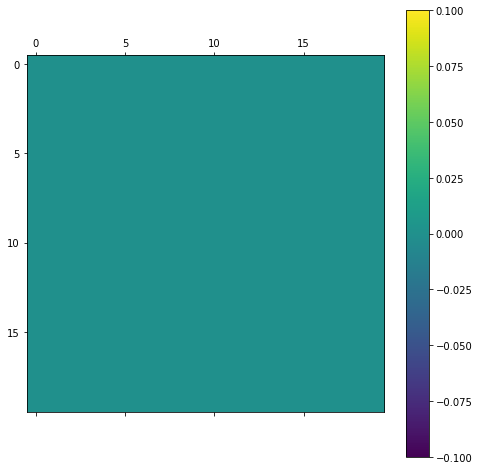

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import TabularTD0
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy


def show_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.matshow(vf)
    plt.colorbar()
    plt.show()


ROWS = 20
COLS = 20

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
vf = np.zeros((ROWS, COLS))
td0 = TabularTD0(env.action_space, policy, vf)

show_value_function(vf)

Episode 0
Episode 10
Episode 20
Episode 30
Episode 40
Episode 50
Episode 60
Episode 70
Episode 80
Episode 90


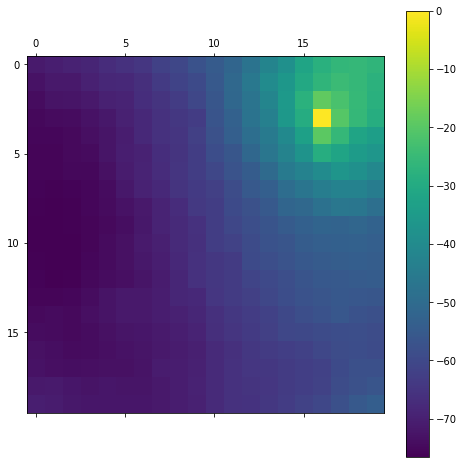

In [3]:
from myelin.utils.callbacks import Callback

class C(Callback):
    def on_episode_begin(self, episode):
        if episode % 10 == 0:
            print('Episode {}'.format(episode))

interaction = RLInteraction(env, td0)
interaction.train(100, callbacks=[C()])

show_value_function(vf)